<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">7. Machine Learning</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [81]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [49]:
display(HTML(html_h4('Realizo la importacion a Dataframe de los datos de los csv creados en la etapa de Prepocessing. ','purple')))

datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

In [50]:
display(HTML(html_h4('Ejemplo de las primeras lineas del dataframe del segmento 1 una vez importado: ','purple')))
datosEEG_seg1_standarizado.head()

,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,1.737682,-1.475134,-0.292529,0.113404,-0.128579,-0.130215,-0.488718,1.422434,2.384682,2.969090,4.0
1,1.349318,-0.698485,-0.366728,-0.291373,0.705022,1.516928,-0.956520,0.417438,0.861329,0.877518,0.0
2,0.248952,1.048973,-0.173741,0.039344,0.290215,0.046625,0.144823,1.595529,3.690499,3.708998,0.0
3,-1.304507,0.854811,-0.306022,2.749333,1.075682,0.810876,0.894613,-0.944526,-0.136710,-0.308915,0.0
4,-0.592505,-0.504323,-0.375519,-0.451322,-0.549978,-0.821343,-0.753899,-0.844119,-0.186910,-1.302714,0.0


# Comienzo con los experimentos para Machine Learning

# 1. Holdout

Conjunto de entrenamiento: 81% del total
Conjunto de validación: 9% del total
Conjunto de prueba: 10% del total

In [51]:
def evaluar_holdout_knn(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)
   
    #modelo
    #model_KNN = KNeighborsClassifier()
    # Entreno el modelo
    model_KNN.fit(X_train, y_train)
    
    # Evaluo el modelo con X_val
    y_predict_knn = model_KNN.predict(X_val)
    
    # Evaluo el rendimiento que ha tenido Validation 
    knn_ac = accuracy_score(y_val, y_predict_knn)
     
    # Evaluo el modelo con X_test
    y_predict_knn_test = model_KNN.predict(X_test)
    
    # Evaluo el rendimiento que ha tenido Validation 
    knn_ac_test = accuracy_score(y_test, y_predict_knn_test)
        
    matriz_confusion_val = confusion_matrix(y_val, y_predict_knn)
    matriz_confusion_test = confusion_matrix(y_test, y_predict_knn_test)
        
    return ((knn_ac), (matriz_confusion_val), (knn_ac_test), (matriz_confusion_test))


In [52]:
modelos_all_knn= []

for experimento_knn in datosEEG_all:
    
    modelos_all_knn.append(evaluar_holdout_knn(experimento_knn))

accuracy_score_knn = []
accuracy_score_test_knn =[]
matriz_confusion_knn = []
matriz_confusion_test_knn = []

for valores_knn in modelos_all_knn:

    accuracy_score_knn.append(valores_knn[0])
    accuracy_score_test_knn.append(valores_knn[2])
    matriz_confusion_knn.append(valores_knn[1])
    matriz_confusion_test_knn.append(valores_knn[3])


,KNN_VAL
Segmento 1,0.416667
Segmento 2,0.400000
Segmento 3,0.277778
Segmento 4,0.222222
All Segmentos after,0.344262
All Segmentos before,0.393443


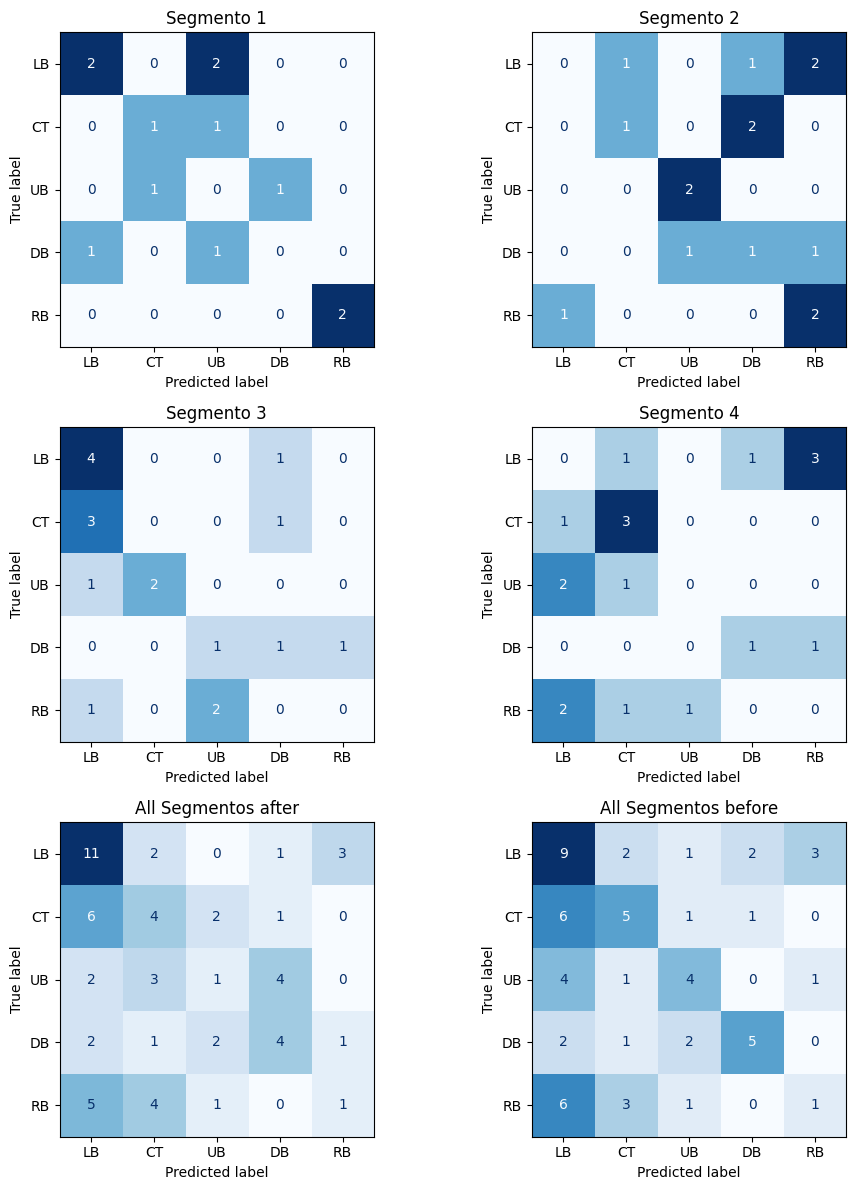

In [53]:

datos_holdout_knn = pd.DataFrame(accuracy_score_knn, columns=['KNN_VAL'], index=(titulos_all))
datos_holdout_knn_test = pd.DataFrame(accuracy_score_test_knn, columns=['KNN_TEST'], index=(titulos_all))

display(datos_holdout_knn)

mc_knn = []

for matrices_knn in matriz_confusion_knn:

    mc_knn.append(pd.DataFrame(matrices_knn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_knn[0], mc_knn[1], mc_knn[2], mc_knn[3], mc_knn[4], mc_knn[5]]

# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


In [54]:

def evaluar_holdout_tree(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)
    
    #model_TREE = DecisionTreeClassifier()
    
    # Entreno el modelo
    model_TREE.fit(X_train, y_train)
    
    # Evaluo el modelo con X_val
    y_predict_tree = model_TREE.predict(X_val)
    
    # Evaluo el rendimiento que ha tenido Validation 
    tree_ac = accuracy_score(y_val, y_predict_tree)
       
    # Evaluo el modelo con X_Test
    y_predict_tree_test = model_TREE.predict(X_test)
    
    # Evaluo el rendimiento que ha tenido Validation 
    tree_ac_test = accuracy_score(y_test, y_predict_tree_test)
    
    
    matriz_confusion_val = confusion_matrix(y_val, y_predict_tree)
    matriz_confusion_test = confusion_matrix(y_test, y_predict_tree_test)
        
    return ((tree_ac), (matriz_confusion_val), (tree_ac_test), (matriz_confusion_test))
    
    

In [55]:
modelos_all_tree= []

for experimento_tree in datosEEG_all:
    
    modelos_all_tree.append(evaluar_holdout_tree(experimento_tree))

accuracy_score_tree = []
accuracy_score_test_tree =[]
matriz_confusion_tree = []
matriz_confusion_test_tree = []

for valores_tree in modelos_all_tree:

    accuracy_score_tree.append(valores_tree[0])
    accuracy_score_test_tree.append(valores_tree[2])
    matriz_confusion_tree.append(valores_tree[1])
    matriz_confusion_test_tree.append(valores_tree[3])


,TREE_VAL
Segmento 1,0.416667
Segmento 2,0.333333
Segmento 3,0.277778
Segmento 4,0.444444
All Segmentos after,0.245902
All Segmentos before,0.229508


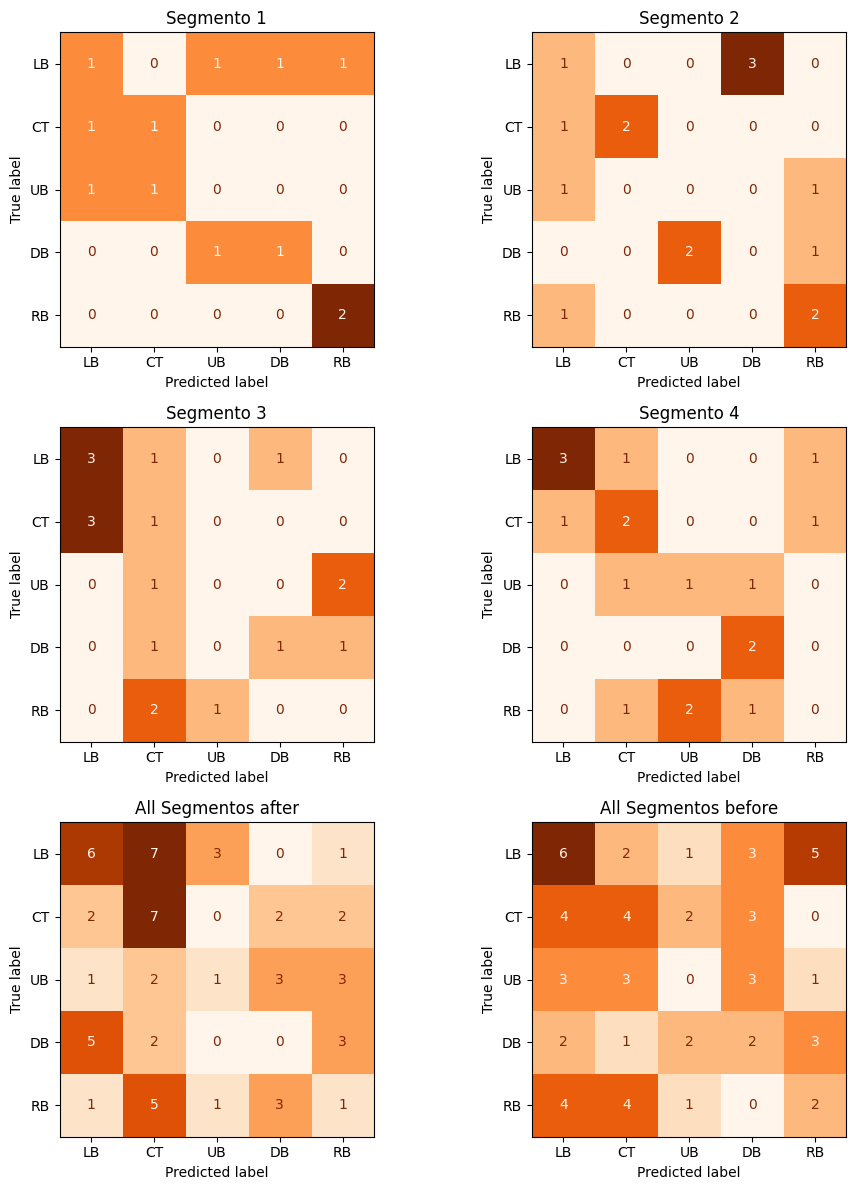

In [56]:
datos_holdout_tree = pd.DataFrame(accuracy_score_tree, columns=['TREE_VAL'], index=(titulos_all))
datos_holdout_tree_test = pd.DataFrame(accuracy_score_test_tree, columns=['TREE_TEST'], index=(titulos_all))

display(datos_holdout_tree)

mc_tree = []

for matrices_tree in matriz_confusion_tree:

    mc_tree.append(pd.DataFrame(matrices_tree, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_tree[0], mc_tree[1], mc_tree[2], mc_tree[3], mc_tree[4], mc_tree[5]]

# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Oranges')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


In [57]:

def evaluar_holdout_random(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)

    #model_RANDOM = RandomForestClassifier(max_depth=MAX_DEPTH, n_estimators=ESTIMATOR)
    # Entreno el modelo
    model_RANDOM.fit(X_train, y_train)
    
    # Evaluo el modelo con X_val
    y_predict_random = model_RANDOM.predict(X_val)
    
    # Evaluo el rendimiento que ha tenido Validation 
    random_ac = accuracy_score(y_val, y_predict_random)  
    
    # Evaluo el modelo con X_Test
    y_predict_random_test = model_RANDOM.predict(X_test)
    
    # Evaluo el rendimiento que ha tenido Validation 
    random_ac_test = accuracy_score(y_test, y_predict_random_test)
    
    matriz_confusion_val = confusion_matrix(y_val, y_predict_random)
    matriz_confusion_test = confusion_matrix(y_test, y_predict_random_test)
        
    return ((random_ac), (matriz_confusion_val), (random_ac_test), (matriz_confusion_test))
    
    

In [58]:
modelos_all_random= []

for experimento_random in datosEEG_all:
    
    modelos_all_random.append(evaluar_holdout_random(experimento_random))

accuracy_score_random = []
accuracy_score_test_random =[]
matriz_confusion_random = []
matriz_confusion_test_random = []

for valores_random in modelos_all_random:

    accuracy_score_random.append(valores_random[0])
    accuracy_score_test_random.append(valores_random[2])
    matriz_confusion_random.append(valores_random[1])
    matriz_confusion_test_random.append(valores_random[3])

  

,RANDOM_VAL
Segmento 1,0.416667
Segmento 2,0.200000
Segmento 3,0.500000
Segmento 4,0.166667
All Segmentos after,0.311475
All Segmentos before,0.295082


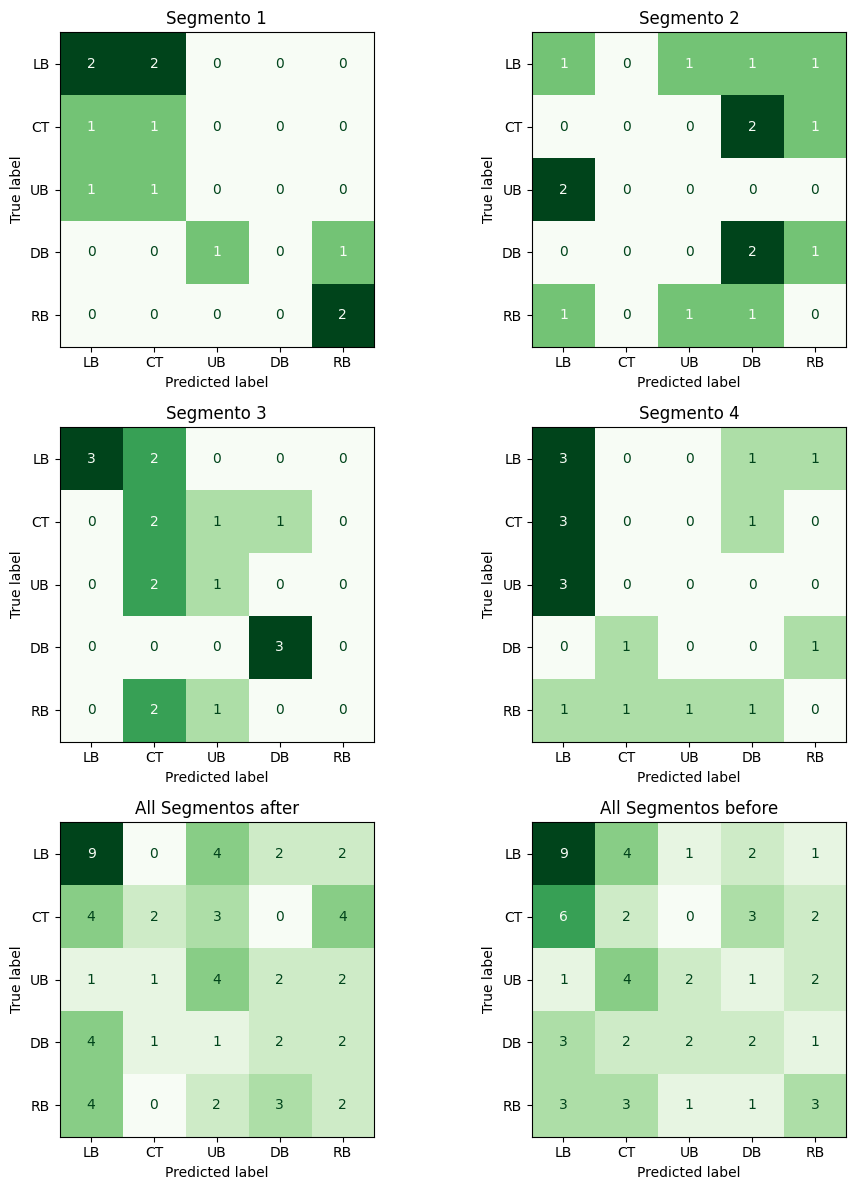

In [59]:
datos_holdout_random = pd.DataFrame(accuracy_score_random, columns=['RANDOM_VAL'], index=(titulos_all))
datos_holdout_random_test = pd.DataFrame(accuracy_score_test_random, columns=['RANDOM_TEST'], index=(titulos_all))

display(datos_holdout_random)

mc_random = []

for matrices_random in matriz_confusion_random:

    mc_random.append(pd.DataFrame(matrices_random, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_random[0], mc_random[1], mc_random[2], mc_random[3], mc_random[4], mc_random[5]]

# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Greens')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()



In [60]:

datos_holdout = pd.concat([datos_holdout_knn, datos_holdout_tree, datos_holdout_random], axis=1)
datos_holdout_test = pd.concat([datos_holdout_knn_test, datos_holdout_tree_test, datos_holdout_random_test], axis=1)

datos_holdout.columns = pd.MultiIndex.from_tuples([("HoldOut","KNN"), ("HoldOut","TREE"), ("HoldOut","RANDOM")])
datos_holdout_test.columns = pd.MultiIndex.from_tuples([("HoldOut","KNN"), ("HoldOut","TREE"), ("HoldOut","RANDOM")])

display(datos_holdout)

HoldOut                    
                           KNN      TREE    RANDOM
Segmento 1            0.416667  0.416667  0.416667
Segmento 2            0.400000  0.333333  0.200000
Segmento 3            0.277778  0.277778  0.500000
Segmento 4            0.222222  0.444444  0.166667
All Segmentos after   0.344262  0.245902  0.311475
All Segmentos before  0.393443  0.229508  0.295082

 # k-fold cross-validation

In [61]:
#ACC_SCORER

def evaluar_cross_val(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)
        
    model_KFOLD = KFold(n_splits=CV)
    model_KNN = KNeighborsClassifier()
    model_TREE = DecisionTreeClassifier()
    model_RANDOM = RandomForestClassifier(max_depth=MAX_DEPTH, n_estimators=ESTIMATOR)

    # Calculo las  metricas       
    #knn = cross_val_score(model_KNN, X_train, y_train, cv=model_KFOLD, scoring=ACC_SCORER) #X_val
    knn = cross_val_score(model_KNN, X_val, y_val, cv=model_KFOLD, scoring=ACC_SCORER)
    #tree = cross_val_score(model_TREE, X_train, y_train, cv=model_KFOLD, scoring=ACC_SCORER)  
    tree = cross_val_score(model_TREE, X_val, y_val, cv=model_KFOLD, scoring=ACC_SCORER)  
    #random = cross_val_score(model_RANDOM, X_train, y_train, cv=model_KFOLD, scoring=ACC_SCORER)
    random = cross_val_score(model_RANDOM, X_val, y_val, cv=model_KFOLD, scoring=ACC_SCORER)
    
    # Calculo la media de las metricas anteriores
    knn_mean = knn.mean()
    tree_mean = tree.mean()
    random_mean = random.mean()
    
    return ((knn_mean), (tree_mean), (random_mean))
    


In [62]:
modelos_all= []

for exp in datosEEG_all:
    
    modelos_all.append(evaluar_cross_val(exp))

datos_cross_val = pd.DataFrame(modelos_all)


# combio los valores anteriores en el dataframene con rename
datos_cross_val = datos_cross_val.rename(index=nuevos_indices)

datos_cross_val.columns = pd.MultiIndex.from_tuples([("KFold-CrossVal","KNN"), ("KFold-CrossVal","TREE"), ("KFold-CrossVal","RANDOM")])


In [63]:
display(datos_cross_val)

KFold-CrossVal                    
                                KNN      TREE    RANDOM
Segmento 1                 0.150000  0.050000  0.050000
Segmento 2                 0.000000  0.350000  0.300000
Segmento 3                 0.100000  0.350000  0.150000
Segmento 4                 0.250000  0.100000  0.000000
All Segmentos after        0.242857  0.292857  0.164286
All Segmentos before       0.245238  0.128571  0.242857

# leave-one-out

In [64]:
#LOO

def evaluar_loo(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)

    model_KFOLD = KFold(n_splits=CV)
    model_KNN = KNeighborsClassifier()
    model_TREE = DecisionTreeClassifier()
    model_RANDOM = RandomForestClassifier(max_depth=MAX_DEPTH, n_estimators=ESTIMATOR)
        
    # Calculo las  metricas       
    knn = cross_val_score(model_KNN, X_val, y_val, cv=LOO, scoring=ACC_SCORER)   
    tree = cross_val_score(model_TREE, X_val, y_val, cv=LOO, scoring=ACC_SCORER) 
    random = cross_val_score(model_RANDOM, X_val, y_val, cv=LOO, scoring=ACC_SCORER)

    # Calculo la media de las metricas anteriores
    knn_mean = knn.mean()
    tree_mean = tree.mean()
    random_mean = random.mean()

    return ((knn_mean), (tree_mean), (random_mean))

In [65]:
modelos_all= []

for exp in datosEEG_all:
    
    modelos_all.append(evaluar_loo(exp))

datos_loo = pd.DataFrame(modelos_all)

# combio los valores anteriores en el dataframene con rename
datos_loo = datos_loo.rename(index=nuevos_indices)

datos_loo.columns = pd.MultiIndex.from_tuples([("Leave-1-out","KNN"), ("Leave-1-out","TREE"), ("Leave-1-out","RANDOM")])




In [66]:
display(datos_loo)

Leave-1-out                    
                             KNN      TREE    RANDOM
Segmento 1              0.166667  0.083333  0.000000
Segmento 2              0.000000  0.266667  0.266667
Segmento 3              0.111111  0.333333  0.222222
Segmento 4              0.222222  0.111111  0.055556
All Segmentos after     0.229508  0.229508  0.196721
All Segmentos before    0.229508  0.196721  0.229508

In [67]:


df_concatenado = pd.concat([datos_holdout, datos_cross_val, datos_loo], axis=1)



In [78]:

print('Datos Evaluación')
comparativa_ml = df_concatenado.style.apply(colorear_mayores, axis=1)

display(comparativa_ml)



Datos Evaluación


In [82]:

print('Datos Test')
comparativa_ml_test = datos_holdout_test.style.apply(colorear_mayores_2, axis=1)

display(comparativa_ml_test)

Datos Test


In [83]:
datos_holdout = pd.concat([datos_holdout_knn, datos_holdout_tree, datos_holdout_random], axis=1)
datos_holdout_test = pd.concat([datos_holdout_knn_test, datos_holdout_tree_test, datos_holdout_random_test], axis=1)
datos_holdout.to_csv(f'../datos/csv/datosEGG_holdout_val.csv', index=False)
datos_holdout_test.to_csv(f'../datos/csv/datosEGG_holdout_test.csv', index=False)